# Programming for Data Science and Artificial Intelligence

## Unsupervised Learning - Clustering - K-Means

## Name: Thantham Khamyai

## Student ID: 122097

### ===Task===

Your work: Let's modify the above scratch code:
- Modify so it **print out the total within-cluster variation**.  
- Then try to **run several k and identify which k is best.**
- Since k-means can be slow due to its pairwise computations, let's implement a **mini-batch k-means** in which the cluster is create using only partial subset of samples.
- Put everything into a class


First of all, lets import neccessary and library, then make some clusters sample data for illustrate how Kmean clustering result.

Text(0.5, 1.0, 'First result')

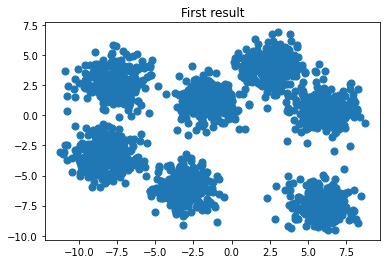

In [1]:
import numpy as np
#Implement K-means from scratch
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from time import time
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=2000, centers=7,
                       cluster_std=1.0, random_state=999)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("First result")

From tutorial, this lab work increase more challage to make 7 clusters with 2000 samples (for mini-batching purpose) and more std upto 1.0. But define random state ar 999 because it produced very beautiful clusters


## Task: KMean clustering class

In [2]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin
import time

class Kmeans:
    
    def __init__ (self, n_clusters=4, tol=1e-2, random_state=None, max_iters=100, batch_size=None):
        
        self.n_clusters = n_clusters
        self.rtol = tol
        self.max_iters = max_iters
        self.random_state = random_state
        
        if not isinstance(batch_size, int) and not isinstance(batch_size, float) and batch_size is not None:
            raise ValueError('batch_size should be float or int')
        
        self.batch_size = batch_size
        
        
    
    def fit(self, X):
        
        # Initialize Training params ----------------------------------------------------------------------------
        m,n = X.shape
        
        rng = np.random.RandomState(self.random_state) # define random state
        
        idx_rand_centroids = rng.permutation(m)[:self.n_clusters] # random idx from X points as initial centroids
        
        previous_centroids = X[idx_rand_centroids] # define initial centroids

        iteration = 0 # start loop counter
        
        # ------------------ Check if batch_size is not define (batch) or define (int as sampling, float as ratio)
        if self.batch_size is None: # if batch_size is None
            
            self.batch_size = m # this is full batch
        
        elif isinstance(self.batch_size, float): # if batch_size is float (ratio)

            self.batch_size = int(self.batch_size * m) # calc number define for ratio

        start_time = time.time()
        
        # Traing the centers-----------------------------------------------------------------------------
        while iteration < self.max_iters: # While iters not reach maximum
            
            idx_start_batch = 0 if self.batch_size == m else rng.randint(m-self.batch_size) # define idx of batch
            
            X_batch = X[idx_start_batch:idx_start_batch+self.batch_size] # define batch set
            
            labels = pairwise_distances_argmin(X_batch, previous_centroids) # get nearest centers for each X point
            
            new_centroids = np.asarray([X_batch[labels == i].mean(axis=0) for i in range(self.n_clusters)])
        
            # Check wheter new cluster and old cluster are nearby together under defined tolerance
            if(np.allclose(previous_centroids, new_centroids, rtol=self.rtol)):
                # if closed -> break
                break
            
            previous_centroids = new_centroids
            
            iteration+=1
        
        # ------------- After training ------------------------------------------------------------------
        
        self.centroids = previous_centroids # save current centroids
        
        sum_var_score = 0 # init total variation
        
        X_clusters_labels = pairwise_distances_argmin(X, self.centroids) # use all X for check variation
        
        for cluster_i in range(self.n_clusters): # each cluster
            
            cluster_i_mean = X[X_clusters_labels==cluster_i].mean(axis=0) # get idx within cluster i
            
            #calc total sumsquare for current class
            sum_var_score += ((X[X_clusters_labels==cluster_i] - cluster_i_mean)** 2).sum() 
        
        self.total_variance_score = sum_var_score

        # -------------------------------- Just imform wheter reach max iteration or not
        if iteration == self.max_iters:
            print(f"!!! Reached max iteration! ({iteration}) within {round(time.time()-start_time,5)} seconds")
        else:
            print(f"Done in {iteration} iterations within {round(time.time()-start_time,5)} seconds")
    
    def predict(self, X):
        
         return pairwise_distances_argmin(X, self.centroids) # Simply calculate distance and get nearest centroid label
        

    

Code may be unreadable for some reason because it was relied on my perspective to build them.

## Task: Test the model with printing out Total cluster variation

before that, this step is just simply do clustering with simple model parameters. I also defined max iterations in case the model couldnot found optimal centriods. tolerance will be used in np.allclose method. For Mini-Batch purpose, just define some integer or fraction floating number to activate batch size ratio, otherwise, False option will automatically activate Batch mode (train all samples). Fianlly, I just fix random state to stabilize the result

In [3]:
model = Kmeans(n_clusters=7, max_iters=10000, tol=1e-12, batch_size=None, random_state=1)
model.fit(X)
preds = model.predict(X)
print(f'Total variation score: {model.total_variance_score}')

Done in 3 iterations within 0.00997 seconds
Total variation score: 4040.0734142610786


Text(0.5, 1.0, 'Final result')

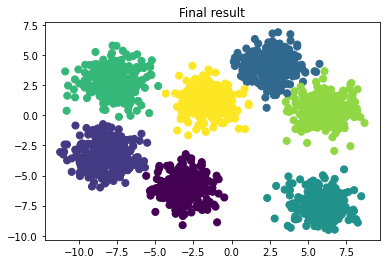

In [4]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=preds, s=50)
plt.title("Final result")

The result should be exactly prefect because we know certain number of clusters.

## Task: Iterative training by Range of K With Mini-Batch Implementation

Nevertheless, What if we dont know K (unknown domain knowledge). We should eun several k and occupie them to plot total cluster variation each k trained

In [5]:
pred_list = []
centroids_list = []
variation_list = []

for i in range(2, 13):
    
    model_i = Kmeans(n_clusters=i, tol=1e-5, max_iters=10000, batch_size=0.2, random_state=1)
    model_i.fit(X)
    print(f'At K = {i} got total variation score: {round(model_i.total_variance_score,3)}')
    
    pred_list.append(model_i.predict(X))
    centroids_list.append(model_i.centroids)
    variation_list.append(model_i.total_variance_score)
    
    print()

Done in 3636 iterations within 1.52399 seconds
At K = 2 got total variation score: 49047.223

Done in 1249 iterations within 0.54565 seconds
At K = 3 got total variation score: 29391.771

!!! Reached max iteration! (10000) within 4.91952 seconds
At K = 4 got total variation score: 17939.927

Done in 4427 iterations within 2.42301 seconds
At K = 5 got total variation score: 13241.602

Done in 1249 iterations within 0.85273 seconds
At K = 6 got total variation score: 7378.126

Done in 1249 iterations within 1.3715 seconds
At K = 7 got total variation score: 4040.212

Done in 2512 iterations within 2.07822 seconds
At K = 8 got total variation score: 3829.059

!!! Reached max iteration! (10000) within 6.52754 seconds
At K = 9 got total variation score: 3675.18

!!! Reached max iteration! (10000) within 6.18651 seconds
At K = 10 got total variation score: 3459.872

!!! Reached max iteration! (10000) within 6.28161 seconds
At K = 11 got total variation score: 3254.261

!!! Reached max iterat

After training, we predict the class of each clusters.

**Important:** Although Mini-Batch approch tends to reduce the time of pairwise step, this learning is probably unstable rather than Batch approach. Consquently, it needs more iterations to stabilize centroids even less time of pairwise distance step each iterations. Therefore, it may take time longer than Batch approch in some case.

In [6]:
pred_list = np.asarray(pred_list)

Now, we can plot the scatter points with each centroid separating each k

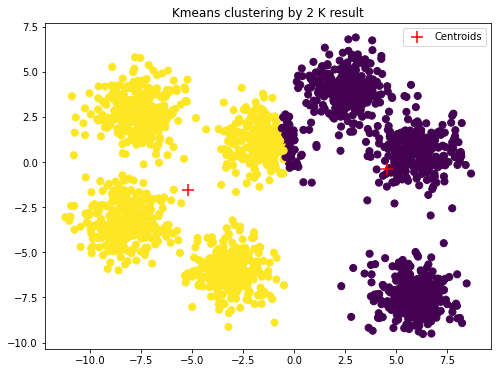

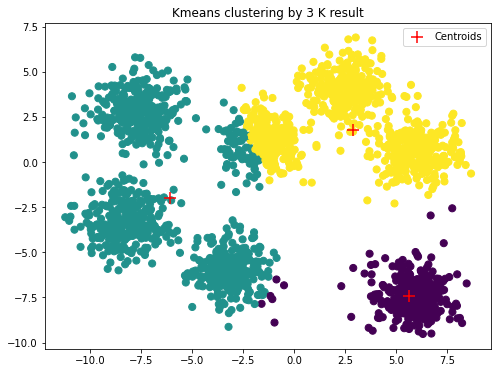

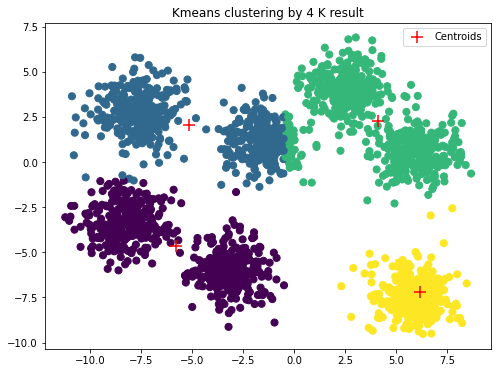

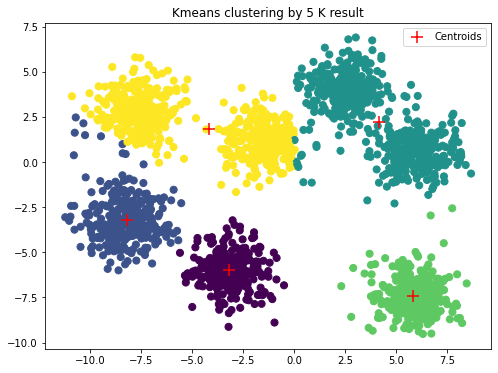

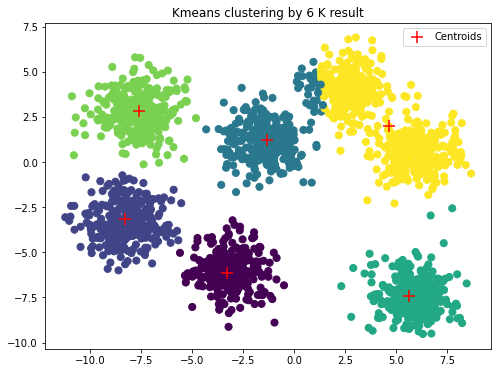

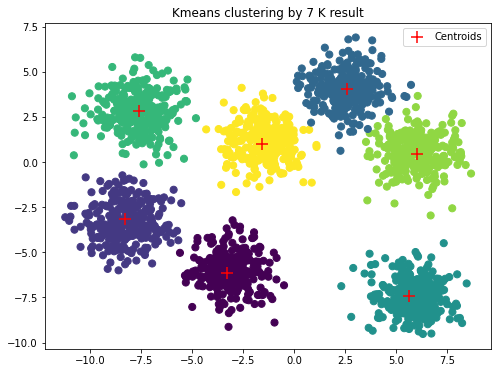

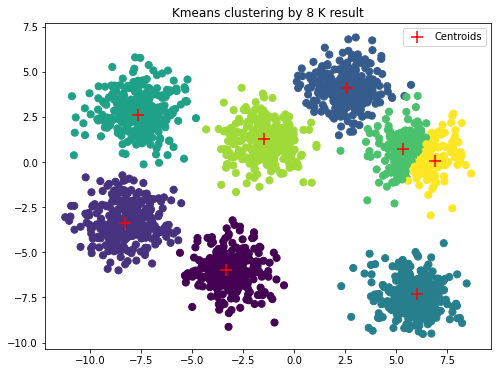

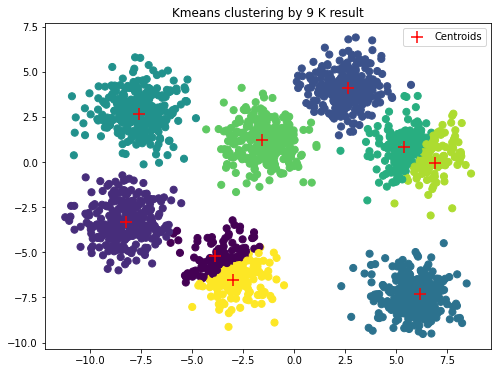

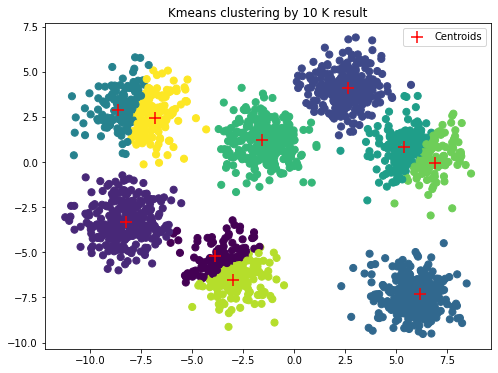

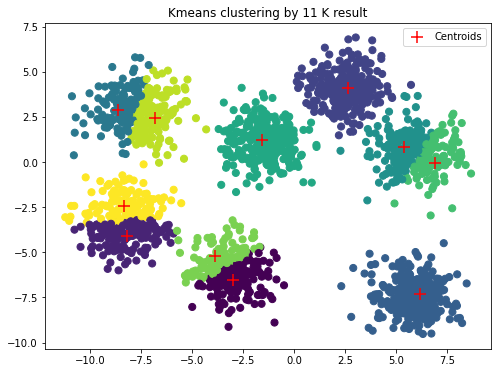

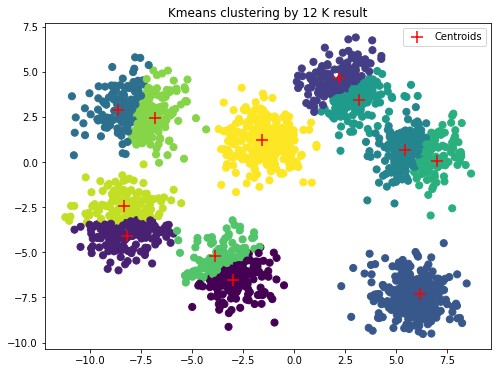

In [7]:
for i in range(len(pred_list)):
    
    plt.figure(figsize=(8,6))
    plt.scatter(X[:, 0], X[:, 1], c=pred_list[i], s=50)
    plt.scatter(centroids_list[i][:,0], centroids_list[i][:,1], c='red',s=150, marker='+', label='Centroids')
    plt.legend()
    plt.title(f"Kmeans clustering by {i+2} K result")
    plt.show()

If we rounghly see the results, it should be exactly that k = 7 should be the best because it discrimated all clusters perfectly. but however, if we plot the **Elbow plot** what will be

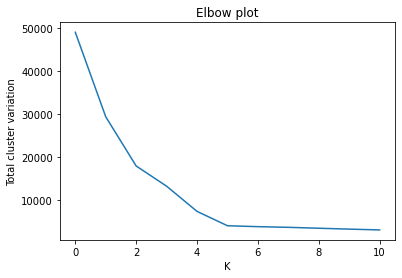

In [8]:
plt.plot(variation_list)
plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Total cluster variation')
plt.show()

We will examine that the near-minimum total variation will be around 5 clusters which may not be true! alhtough 7 is correct one.

This is the reason why **Domain Knowledge is important!!** to define suitable number of k implemented in real world project